In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [276]:
start='2012-01-01'
end='2022-12-31'
stock='GOOG'
data=yf.download(stock,start,end)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1860\520336751.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [277]:
data .reset_index(inplace=True)
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475201,16.543042,16.152336,16.166451,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.279305,89.567592,87.102251,87.102251,17815000
2764,2022-12-27,87.410408,88.971130,87.017745,88.782251,15470900
2765,2022-12-28,85.949104,87.996929,85.859640,86.982960,17879600


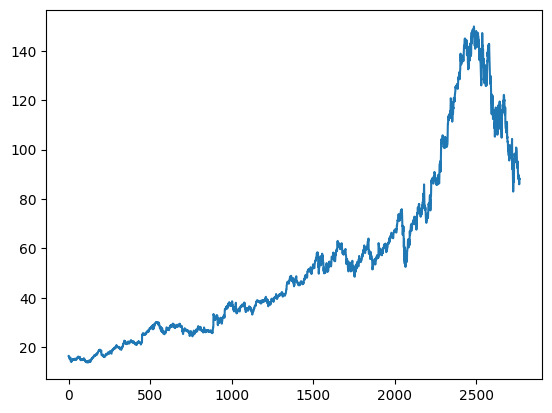

In [278]:
plt.plot(data.Close)


In [279]:
ma100=data.Close.rolling(100).mean()
ma100

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,101.299858
2764,100.992286
2765,100.676563
2766,100.386388


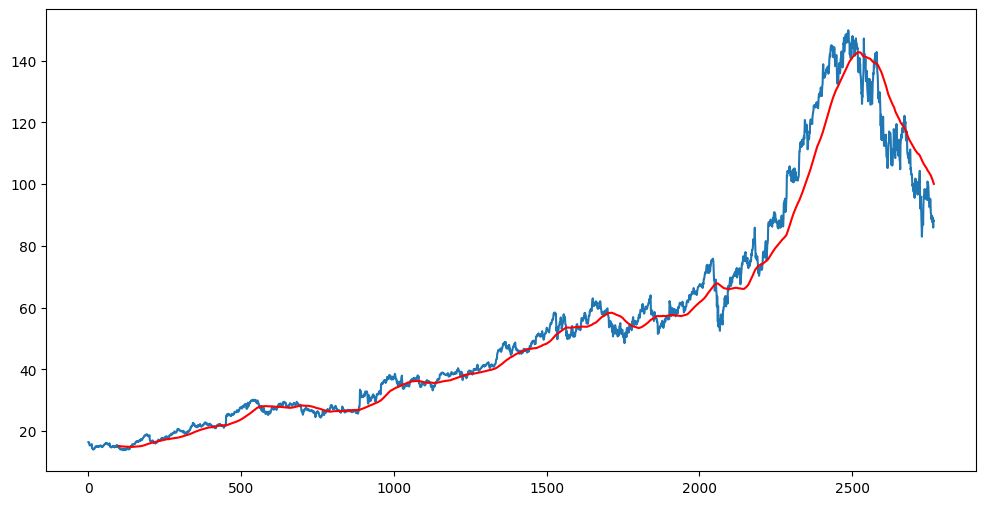

In [280]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,color='red')

In [281]:
ma200=data.Close.rolling(200).mean()
ma200

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,110.294791
2764,110.083320
2765,109.883105
2766,109.680756


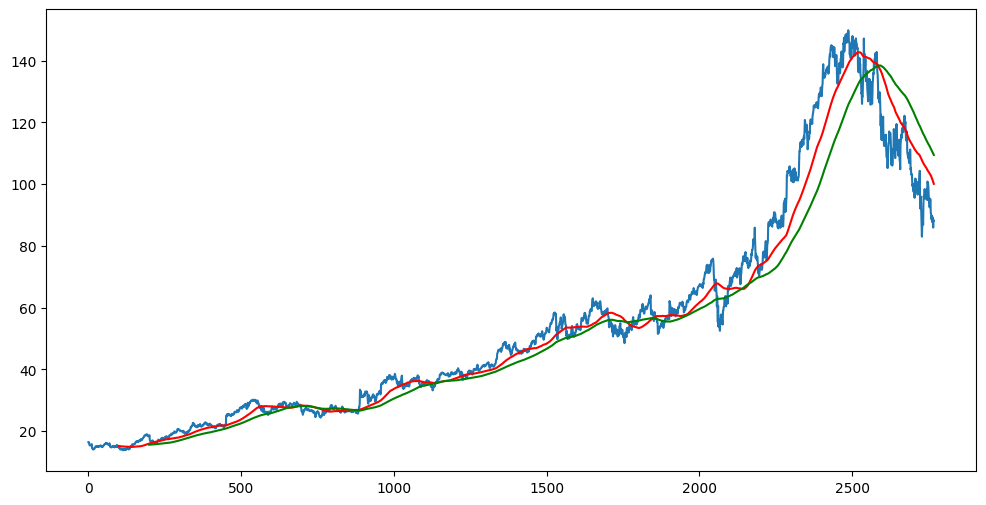

In [282]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,color='red')
plt.plot(ma200,color='green')

In [283]:
data.dropna(inplace=True)

In [284]:
train_data = data.Close[0 : int(len(data)*0.8)]
test_data = data.Close[int(len(data)*0.8) : len(data)]
train_data.shape[0], test_data.shape[0]

(2214, 554)

In [285]:
data_train.head()

Ticker,GOOG
0,16.475201
1,16.546257
2,16.316738
3,16.094151
4,15.411779


In [286]:
data_test.head()

Ticker,GOOG
2214,77.336800
2215,79.194756
2216,80.289253
2217,81.565163
2218,79.052597


In [287]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [288]:
train_data_scale = scaler.fit_transform(train_data)

In [289]:
x, y = [], []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100: i])
    y.append(train_data_scale[i, 0])
x, y = np.array(x), np.array(y)

    

In [290]:
#ML model


In [291]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',  return_sequences= True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Harsh Khanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [292]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 73s 682ms/step - loss: 0.0354
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 668ms/step - loss: 0.0073
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 668ms/step - loss: 0.0070
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 46s 679ms/step - loss: 0.0064
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 669ms/step - loss: 0.0055
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 46s 688ms/step - loss: 0.0049
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - loss: 0.0049
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 669ms/step - loss: 0.0045
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 663ms/step - loss: 0.0046
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 44s 660ms/step - loss: 0.0043
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.0038
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - loss: 0.0039
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 668ms/step - loss: 0.0036
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 673ms/step - loss: 0.0034
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 

In [293]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [294]:
past_100_days = train_data.tail(100)
test_data = pd.concat([past_100_days, test_data], ignore_index=True)
test_data

Ticker,GOOG
0,71.023827
1,71.167969
2,71.535774
3,71.394630
4,70.191772
...,...
649,89.279305
650,87.410408
651,85.949104
652,88.424385


In [295]:

test_data_scale = scaler.fit_transform(test_data)

In [296]:
x, y = [], []
for i in range(100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100: i])
    y.append(test_data_scale[i, 0])

x, y = np.array(x), np.array(y)
    

In [297]:
#making prediction
y_predict = model.predict(x)



18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step


In [298]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

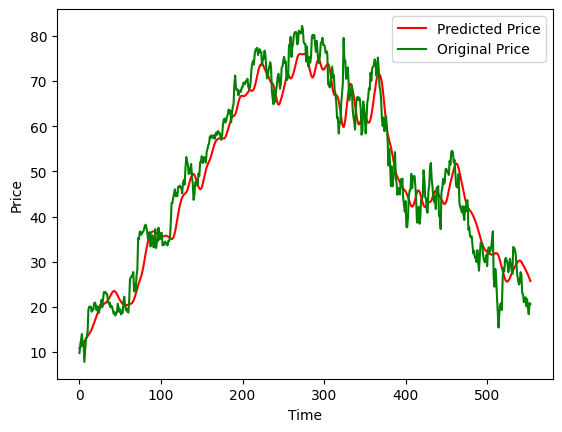

In [299]:
plt.Figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [300]:
model.save('Stock_Price_Predictor.keras')
